In [ ]:
#Solution of Assignment_8
#Instructor: Gopal Hazra
#Computational Physics-PHY617,
#Dept of Physics, IIT Kanpur


# Question-1
z_arr = [0, 1.25, 3.75] #in cms
T_arr = [13.5, 12.0, 10.0] # in Celsius
k = 3.5*(10**(-7)) #m^2/s
rho = 1800 # kg/m^3
C = 840 # J/(kg Celsius)
def dT_dz(z):
  Term1 = T_arr[0]*(2*z - z_arr[1] - z_arr[2])/((z_arr[0] - z_arr[1])*(z_arr[0] - z_arr[2]))
  Term2 = T_arr[1]*(2*z - z_arr[0] - z_arr[2])/((z_arr[1] - z_arr[0])*(z_arr[1] - z_arr[2]))
  Term3 = T_arr[2]*(2*z - z_arr[0] - z_arr[1])/((z_arr[2] - z_arr[0])*(z_arr[2] - z_arr[1]))
  der = Term1 + Term2 + Term3
  return der

soil_air_gradient =  dT_dz(0)*100 # x100 to express in units of Celsius/m
Heat_flux = -k*rho*C*soil_air_gradient
print("Gradient in soil air interface = ", np.round(soil_air_gradient,3), "Celsius/m")
print("Heat flux into ground = ", np.round(Heat_flux,3), "W/m^2")

Gradient in soil air interface =  -133.333 Celsius/m
Heat flux into ground =  70.56 W/m^2


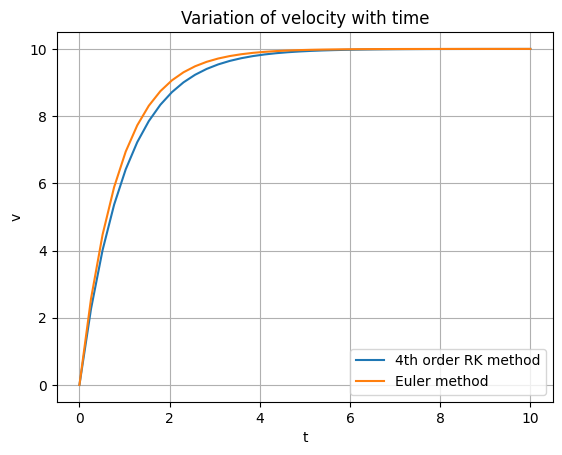

Approx Terminal velocity obtained from Euler method =  9.999904 m/s
Approx Terminal velocity obtained from fourth order Runge Kutta method=  9.999546 m/s


In [ ]:
# Question-2
import numpy as np
import matplotlib.pyplot as plt


def f(v,t):
    return a - b*v
# Euler's method
def odeEuler(f,xinit,tinit,tfinal,n):
    h = (tfinal - tinit)/(n - 1)
    x = np.zeros(n)
    t = np.linspace(tinit,tfinal,n)
    x[0] = xinit
    for i in range(n-1):
        x[i+1] = x[i] + h*f(x[i],t[i])
    return x,t

# Fourth order runge Kutta method
def odeRK4(f,xinit,tinit,tfinal,n):
    h = (tfinal - tinit)/(n - 1)
    x = np.zeros(n)
    t = np.linspace(tinit,tfinal,n)
    x[0] = xinit
    for i in range(n-1):
        k1 = h*f(x[i],t[i])
        k2 = h*f(x[i]+(k1)/2,t[i]+h/2)
        k3 = h*f(x[i]+(k2)/2,t[i]+h/2)
        k4 = h*f(x[i]+k3,t[i])
        x[i+1] = x[i] + (k1+2*k2+2*k3+k4)/6
    return x,t
a = 10.0 ; b = 1.0
n= 40


vEuler,t = odeEuler(f,0,0,10,n)
vRK4,t = odeRK4(f,0,0,10,n)
plt.plot(t,vRK4, label = '4th order RK method')
plt.plot(t,vEuler, label = 'Euler method')
plt.title('Variation of velocity with time')
plt.xlabel('t');plt.ylabel('v')
plt.grid()
plt.legend()
plt.show()
print('Approx Terminal velocity obtained from Euler method = ',np.round(vEuler[-1],6), 'm/s')
print('Approx Terminal velocity obtained from fourth order Runge Kutta method= ',np.round(vRK4[-1],6), 'm/s')

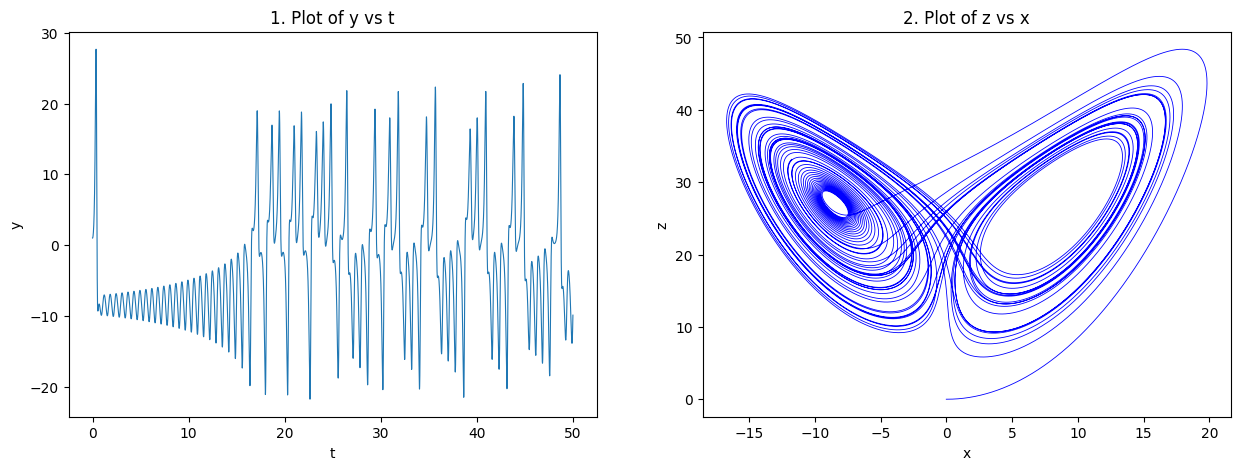

In [ ]:
#Question-3
import numpy as np
import matplotlib.pyplot as plt

## Define system of lorenz equations
def f(x,t):
    ## x is an array of length 3, where: x[0] = x, x[1] = y, x[2] = z
    return np.array([sigma*(x[1]-x[0]) , r*x[0]-x[1]-x[0]*x[2] , x[0]*x[1]-b*x[2]])

def odeSystemRK4(f,xinit,tinit,tfinal,nt):
    '''
    Solves the system of Differential equations using Runge-Kutta 4 method:
    dx1/dt = f1(x1,x2,---,x_nx,t), dx2/dt = f2(x1,x2,---,x_nx,t), ---, dx_nx/dt = f_nx(x1,x2,---,x_nx,t)
    In vector form: dr/dt = f(x1,x2,---,x_nx,t), r = (x1,x2,---x_nx)
    f - Vector function of position and time coordinates, returns an array [f1,f2,---f_nx]
    xinit = [x1(0),x2(0),---,x_nx(0)] - Array of initial conditions
    nt - Number of time points
    nx - Number of variables to be solved
    '''
    nx = len(xinit)
    h = (tfinal - tinit)/(nt - 1)
    x = np.zeros((nx,nt))
    t = np.linspace(tinit,tfinal,nt)
    x[:,0] = xinit
    for i in range(nt-1):
        k1 = h*f(x[:,i],t[i])
        k2 = h*f(x[:,i]+(k1)/2,t[i]+h/2)
        k3 = h*f(x[:,i]+(k2)/2,t[i]+h/2)
        k4 = h*f(x[:,i]+k3,t[i])
        x[:,i+1] = x[:,i] + (k1+2*k2+2*k3+k4)/6
    return x,t

sigma = 10; r = 28; b = 8/3
xinit = np.array([0,1,0])
x,t = odeSystemRK4(f,xinit,0,50,100000)

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t,x[1,:], linewidth = 0.8)
ax1.set_title('1. Plot of y vs t')
ax1.set_xlabel('t'); ax1.set_ylabel('y')

ax2.plot(x[0,:],x[2,:], linewidth = 0.6, color = 'blue')
ax2.set_title('2. Plot of z vs x')
ax2.set_xlabel('x'); ax2.set_ylabel('z')
plt.show()

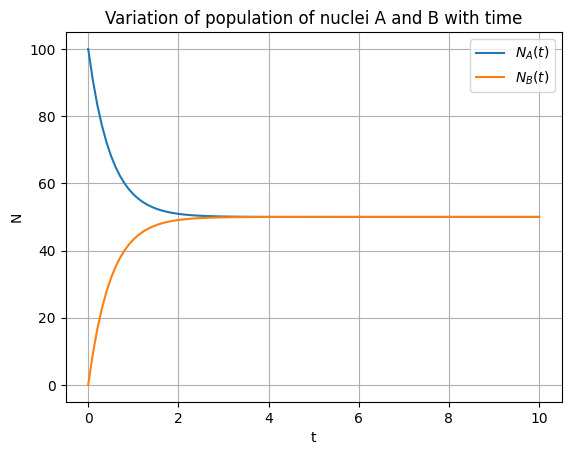

Steady state polpulations: N_A = 50.00000010309155, N_B = 49.99999989690844
Derivatives at steady state: dN_A/dt = -2.061831096966671e-07, dN_B/dt = 2.061831096966671e-07


In [ ]:
#Question-4

import numpy as np
import matplotlib.pyplot as plt

## Define system of Differential equations
def f(N,t):
    ## N is an array of length 2, where: N[0] = N_A, N[1] = N_B
    return np.array([(N[1] - N[0])/tau , (N[0] - N[1])/tau])

def odeSystemRK4(f,xinit,tinit,tfinal,nt):
    '''
    Solves the system of Differential equations using Runge-Kutta 4 method:
    dx1/dt = f1(x1,x2,---,x_nx,t), dx2/dt = f2(x1,x2,---,x_nx,t), ---, dx_nx/dt = f_nx(x1,x2,---,x_nx,t)
    In vector form: dr/dt = f(x1,x2,---,x_nx,t), r = (x1,x2,---x_nx)
    f - Vector function of position and time coordinates, returns an array [f1,f2,---f_nx]
    xinit = [x1(0),x2(0),---,x_nx(0)] - Array of initial conditions
    '''
    nx = len(xinit)
    h = (tfinal - tinit)/(nt - 1)
    x = np.zeros((nx,nt))
    t = np.linspace(tinit,tfinal,nt)
    x[:,0] = xinit
    for i in range(nt-1):
        k1 = h*f(x[:,i],t[i])
        k2 = h*f(x[:,i]+(k1)/2,t[i]+h/2)
        k3 = h*f(x[:,i]+(k2)/2,t[i]+h/2)
        k4 = h*f(x[:,i]+k3,t[i])
        x[:,i+1] = x[:,i] + (k1+2*k2+2*k3+k4)/6
    return x,t

tau = 1
Ninit = np.array([100,0])
N,t = odeSystemRK4(f,Ninit,0,10,100)

plt.plot(t,N[0,:],label = '$N_A(t)$')
plt.plot(t,N[1,:],label = '$N_B(t)$')
plt.title('Variation of population of nuclei A and B with time')
plt.xlabel('t');plt.ylabel('N')
plt.grid();plt.legend()
plt.show()

steadyDiff = f(N[:,-1],10)
print('Steady state polpulations: N_A = {}, N_B = {}'.format(N[0,-1],N[1,-1]))
print('Derivatives at steady state: dN_A/dt = {}, dN_B/dt = {}'.format(steadyDiff[0],steadyDiff[1]))